In [1]:
#Import Libraries
# !pip install yellowbrick
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Recursive Feature Elimination

# RFECV with Decision Tree

In [ ]:
#read the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [7]:
x = df.iloc[:,:-1]
y = df['fetal_health']

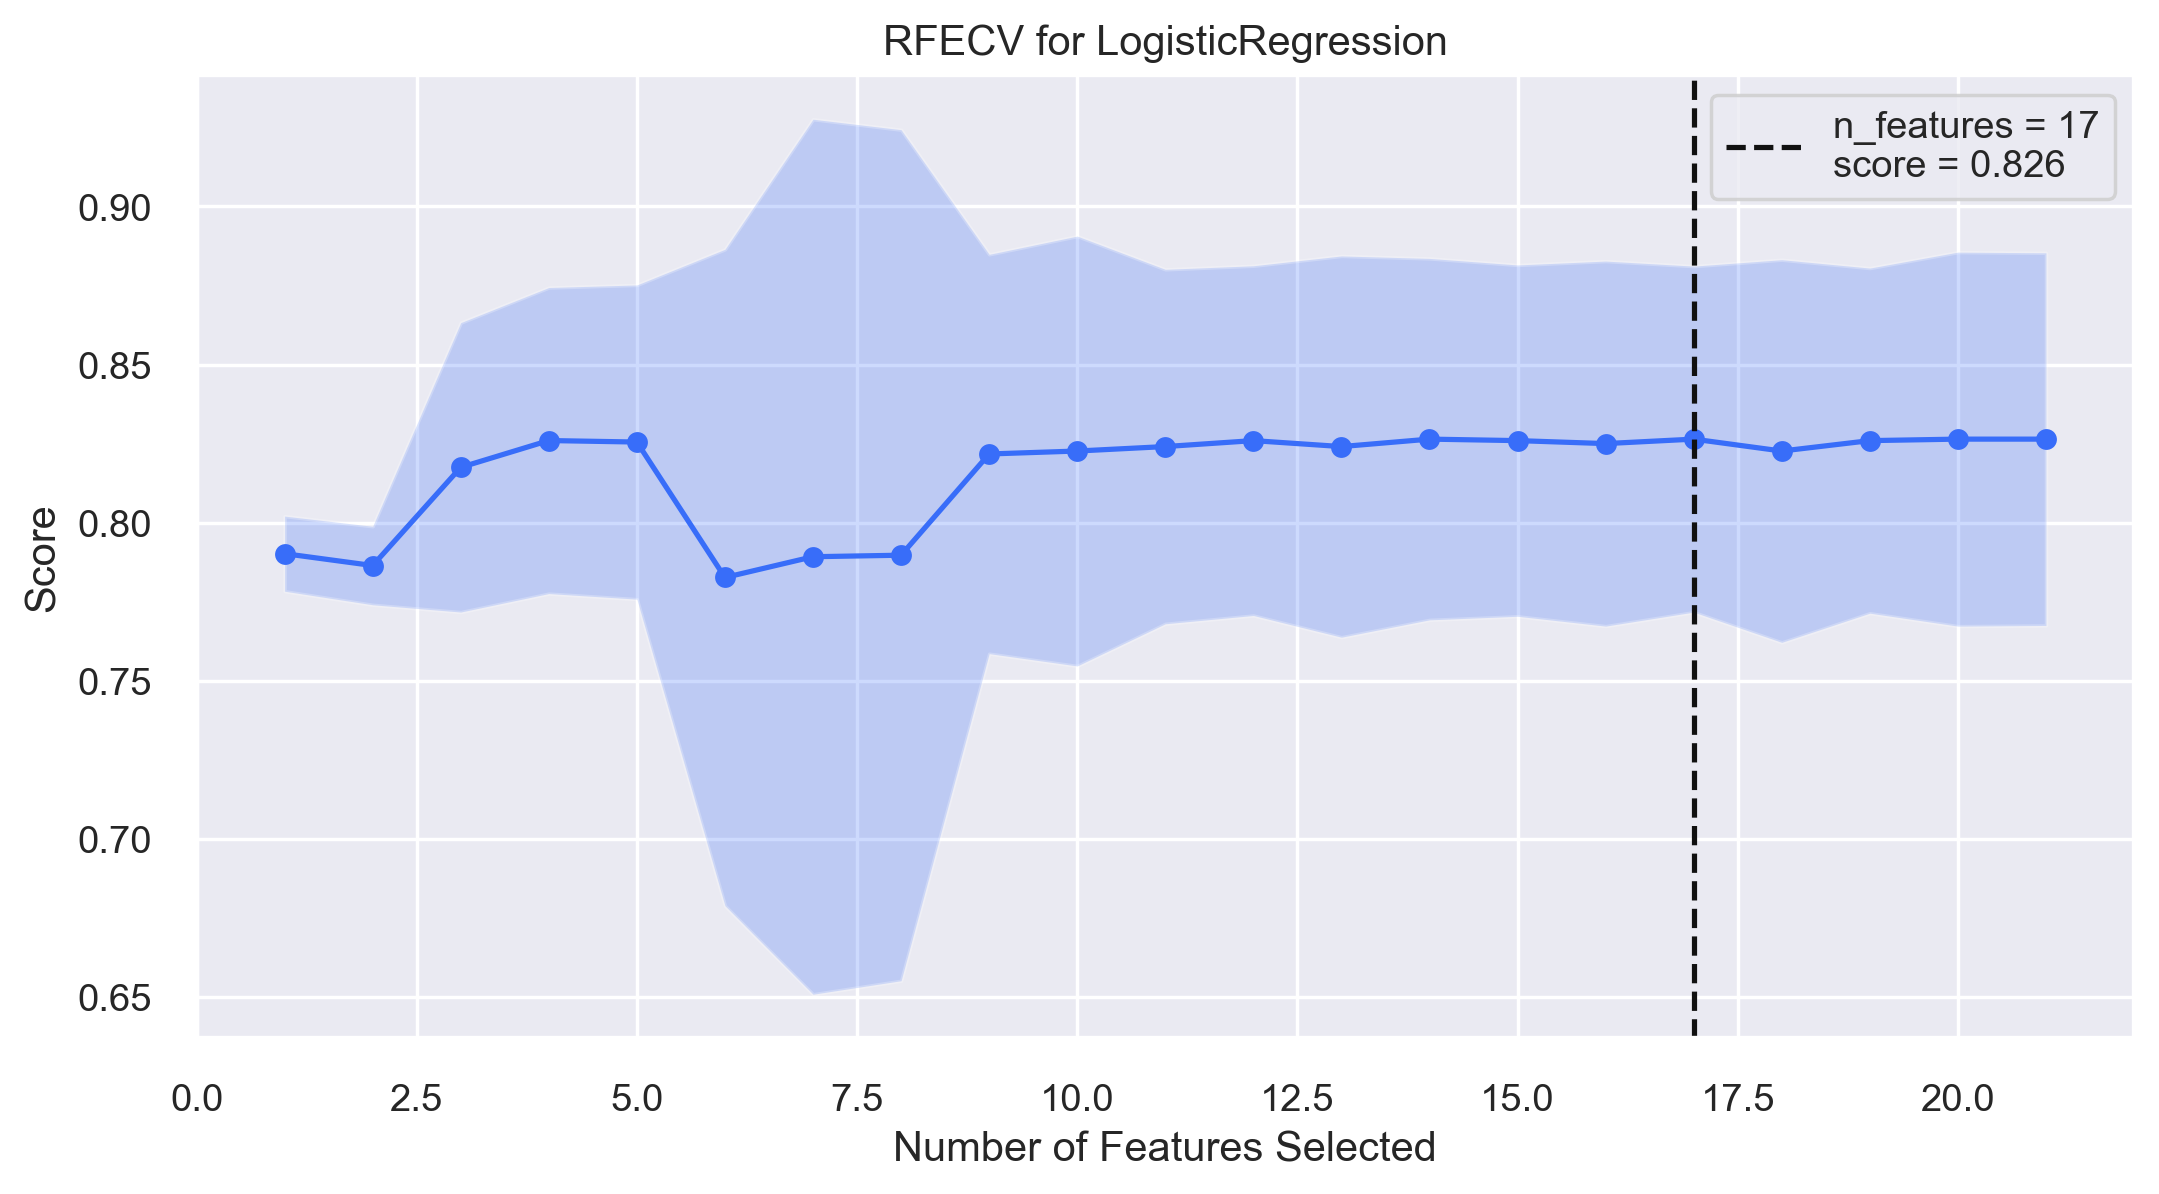

In [9]:
rfe = rfecv(LogisticRegression(),x,y)

In [11]:
rfe.ranking_

array([1, 2, 1, 1, 3, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
x.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [15]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [17]:
rfe_Sel

,Ranking,Features
0,1,baseline value
1,2,accelerations
2,1,fetal_movement
3,1,uterine_contractions
4,3,light_decelerations
5,5,severe_decelerations
6,4,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [19]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
0,1,baseline value
2,1,fetal_movement
3,1,uterine_contractions
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
11,1,histogram_width
12,1,histogram_min
13,1,histogram_max


# Tree Based method

In [ ]:
#Tree Based method

In [21]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [23]:
dt.feature_importances_

array([0.04493772, 0.04262624, 0.01598289, 0.03144185, 0.00797381,
       0.        , 0.03670803, 0.29844337, 0.01809235, 0.18703397,
       0.01099588, 0.01486306, 0.00988358, 0.02119166, 0.02285876,
       0.        , 0.00721748, 0.14945374, 0.05406402, 0.02213688,
       0.0040947 ])

In [25]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [27]:
ig_sel

,IG,Features
0,0.044938,baseline value
1,0.042626,accelerations
2,0.015983,fetal_movement
3,0.031442,uterine_contractions
4,0.007974,light_decelerations
5,0.000000,severe_decelerations
6,0.036708,prolongued_decelerations
7,0.298443,abnormal_short_term_variability
8,0.018092,mean_value_of_short_term_variability
9,0.187034,percentage_of_time_with_abnormal_long_term_var...


In [31]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
7,0.298443,abnormal_short_term_variability
9,0.187034,percentage_of_time_with_abnormal_long_term_var...
17,0.149454,histogram_mean
18,0.054064,histogram_median
0,0.044938,baseline value
1,0.042626,accelerations
6,0.036708,prolongued_decelerations
3,0.031442,uterine_contractions
14,0.022859,histogram_number_of_peaks
19,0.022137,histogram_variance
